In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

# Loading Audio Files
출처 : https://www.youtube.com/watch?v=EycaSbIRx-0

In [2]:
file1 = '../../nmb_data/teamvoice/testvoice_F2.wav'
file2 = '../../nmb_data/teamvoice/testvoice_F1.wav'
file3 = '../../nmb_data/teamvoice/testvoice_M2.wav' 

In [3]:
# load audio files with librosa
debussy, sr = librosa.load(file1)
redhot, _ = librosa.load(file2)
duke, _ = librosa.load(file3)

# Root-mean-squared energy with Librosa

In [4]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [5]:
rms_debussy = librosa.feature.rms(debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [6]:
print(rms_debussy.shape)

(216,)


# Visualise RMSE + waveform

(216,)


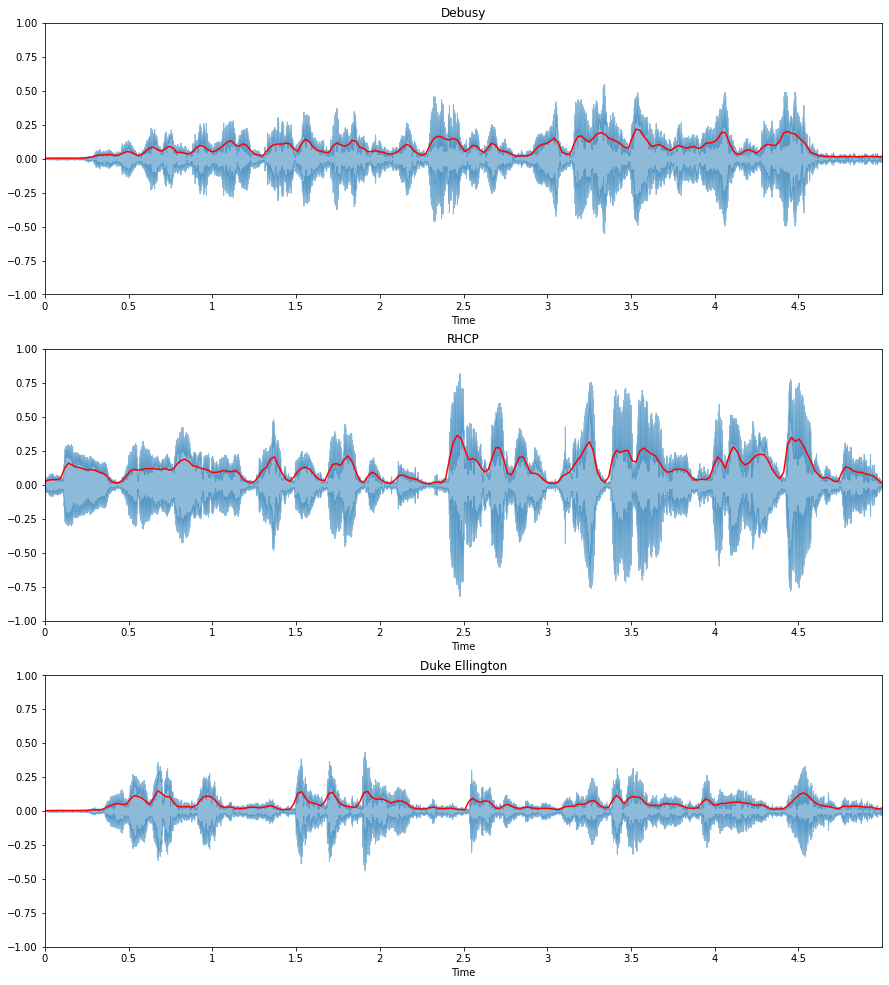

In [7]:
frames = range(len(rms_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
print(t.shape)

# rms energy is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

- red : RMS energy

# RMSE from scratch

In [8]:
def rmse(signal, frame_size, hop_length):
    rmse = []
    
    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

In [9]:
rms_debussy1 = rmse(debussy, FRAME_SIZE, HOP_LENGTH)
rms_redhot1 = rmse(redhot, FRAME_SIZE, HOP_LENGTH)
rms_duke1 = rmse(duke, FRAME_SIZE, HOP_LENGTH)

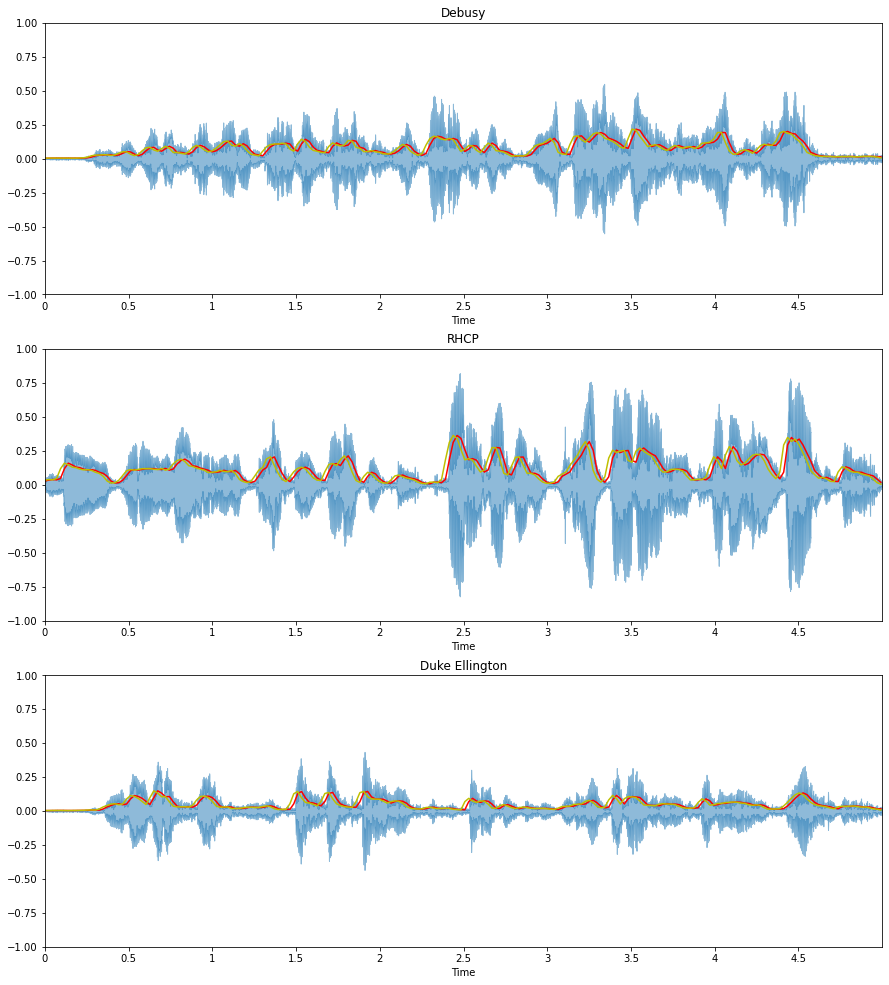

In [10]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.plot(t, rms_debussy1, color="y")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.plot(t, rms_redhot1, color="y")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.plot(t, rms_duke1, color="y")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

yello 와 red 거의 비슷한 결과를 보인다.

--------------------

# Zero-crossing rate with Librosa

In [11]:
zcr_debussy = librosa.feature.zero_crossing_rate(debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [12]:
print(zcr_debussy.size)
print(zcr_redhot.size)
print(zcr_duke.size)

216
216
216


# Visualise zero-crossing rate with Librosa

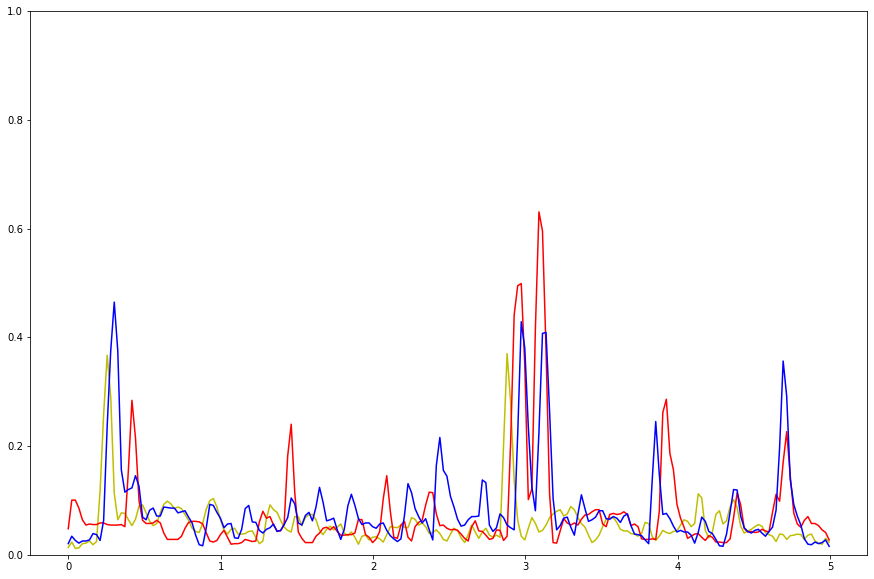

In [13]:
# zero crossing rate

plt.figure(figsize=(15, 10))

plt.plot(t, zcr_debussy, color="y")
plt.plot(t, zcr_redhot, color="r")
plt.plot(t, zcr_duke, color="b")
plt.ylim(0, 1)
plt.show()

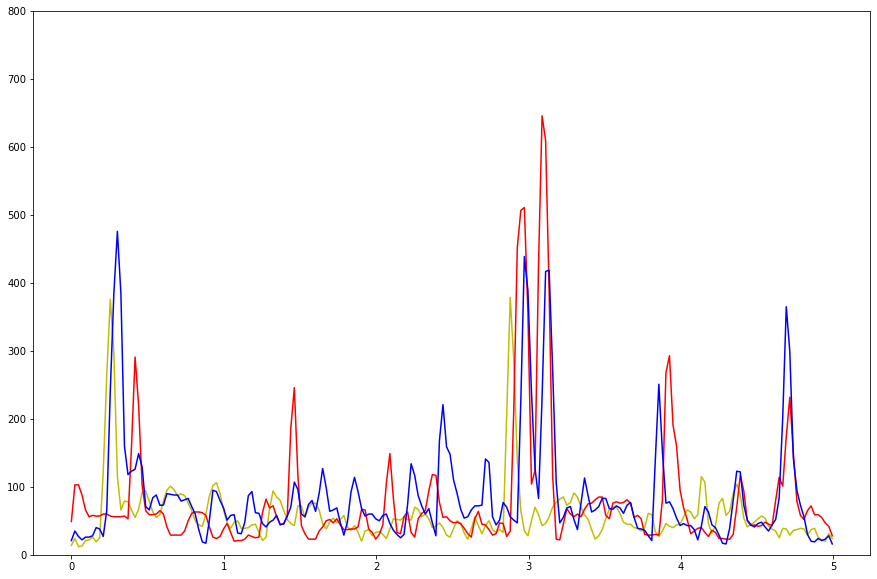

In [14]:
# actual number of zero crossing

plt.figure(figsize=(15, 10))

plt.plot(t, zcr_debussy * FRAME_SIZE , color="y")
plt.plot(t, zcr_redhot * FRAME_SIZE , color="r")
plt.plot(t, zcr_duke * FRAME_SIZE  , color="b")
plt.ylim(0, 800)
plt.show()

# ZCR: Voice vs Noise

In [1]:
voice_file = '../../nmb_data/voice.wav'
noise_file = '../../nmb_data/noise.wav'

In [16]:
# load audio files
voice, srsr = librosa.load(voice_file, duration=15)
noise, _ = librosa.load(noise_file, duration=15)

print(voice.shape)
print("Audio length (seconds) : %.2f" % (len(voice) / srsr)) 

(330750,)
Audio length (seconds) : 15.00


In [17]:
# get ZCR
zcr_voice = librosa.feature.zero_crossing_rate(voice, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(noise, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

(646,)


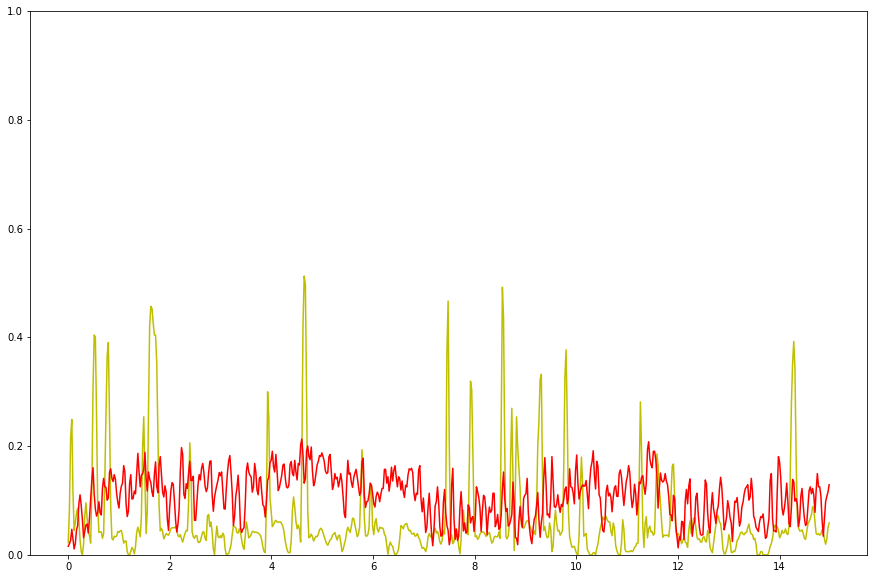

In [18]:
frames = range(len(zcr_voice))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
print(t.shape)

plt.figure(figsize=(15, 10))

plt.plot(t, zcr_voice, color="y")
plt.plot(t, zcr_noise, color="r")
plt.ylim(0, 1)
plt.show()

yellow (voice)    
red(noise) : # of crossing rate가 voice 보다 많다.